## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.549494  1.368694 -1.296580 -0.490347 -0.493623 -0.218746
1  1.323593 -0.103903  1.593566 -1.190788 -0.482140  0.456879
2  0.079255  0.094599 -0.816972  1.561095  1.692069  1.920254
3 -1.467556  1.546391  0.658971  0.751551  0.653274 -0.173847
4  1.042291  1.801180  1.678679 -0.188644  1.728543  1.012153


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9909745	total: 57.3ms	remaining: 57.3s
1:	learn: 0.9819679	total: 57.9ms	remaining: 28.9s
2:	learn: 0.9737353	total: 58.4ms	remaining: 19.4s
3:	learn: 0.9648665	total: 58.8ms	remaining: 14.6s
4:	learn: 0.9574794	total: 59.4ms	remaining: 11.8s
5:	learn: 0.9481497	total: 60ms	remaining: 9.93s
6:	learn: 0.9377612	total: 60.7ms	remaining: 8.62s
7:	learn: 0.9287260	total: 61.4ms	remaining: 7.62s
8:	learn: 0.9198028	total: 62.1ms	remaining: 6.84s
9:	learn: 0.9110387	total: 62.6ms	remaining: 6.2s
10:	learn: 0.9022655	total: 63.2ms	remaining: 5.68s
11:	learn: 0.8926022	total: 63.6ms	remaining: 5.24s
12:	learn: 0.8832806	total: 64.1ms	remaining: 4.87s
13:	learn: 0.8731755	total: 64.5ms	remaining: 4.54s
14:	learn: 0.8655987	total: 64.9ms	remaining: 4.26s
15:	learn: 0.8568755	total: 65.4ms	remaining: 4.02s
16:	learn: 0.8481646	total: 65.8ms	remaining: 3.8s
17:	learn: 0.8416634	total: 66.3ms	remaining: 3.61s
18:	learn: 0.8327301	total: 66.8ms	remaining: 3.

107:	learn: 0.4015413	total: 107ms	remaining: 881ms
108:	learn: 0.3990381	total: 107ms	remaining: 875ms
109:	learn: 0.3964282	total: 108ms	remaining: 871ms
110:	learn: 0.3935309	total: 108ms	remaining: 866ms
111:	learn: 0.3908296	total: 109ms	remaining: 861ms
112:	learn: 0.3881147	total: 109ms	remaining: 855ms
113:	learn: 0.3854901	total: 109ms	remaining: 851ms
114:	learn: 0.3824293	total: 110ms	remaining: 845ms
115:	learn: 0.3798622	total: 110ms	remaining: 841ms
116:	learn: 0.3772002	total: 111ms	remaining: 837ms
117:	learn: 0.3744392	total: 111ms	remaining: 832ms
118:	learn: 0.3725570	total: 112ms	remaining: 828ms
119:	learn: 0.3701123	total: 112ms	remaining: 824ms
120:	learn: 0.3674428	total: 113ms	remaining: 820ms
121:	learn: 0.3652201	total: 113ms	remaining: 816ms
122:	learn: 0.3626116	total: 114ms	remaining: 811ms
123:	learn: 0.3596817	total: 114ms	remaining: 808ms
124:	learn: 0.3565093	total: 115ms	remaining: 803ms
125:	learn: 0.3538524	total: 115ms	remaining: 800ms
126:	learn: 

272:	learn: 0.1324283	total: 186ms	remaining: 495ms
273:	learn: 0.1315907	total: 186ms	remaining: 494ms
274:	learn: 0.1306712	total: 187ms	remaining: 493ms
275:	learn: 0.1297567	total: 187ms	remaining: 492ms
276:	learn: 0.1288069	total: 188ms	remaining: 490ms
277:	learn: 0.1278807	total: 188ms	remaining: 489ms
278:	learn: 0.1268425	total: 189ms	remaining: 487ms
279:	learn: 0.1258133	total: 189ms	remaining: 486ms
280:	learn: 0.1250294	total: 190ms	remaining: 485ms
281:	learn: 0.1239934	total: 190ms	remaining: 484ms
282:	learn: 0.1232317	total: 190ms	remaining: 482ms
283:	learn: 0.1222422	total: 191ms	remaining: 481ms
284:	learn: 0.1213771	total: 191ms	remaining: 480ms
285:	learn: 0.1206558	total: 192ms	remaining: 479ms
286:	learn: 0.1198246	total: 192ms	remaining: 478ms
287:	learn: 0.1190567	total: 193ms	remaining: 477ms
288:	learn: 0.1182275	total: 193ms	remaining: 476ms
289:	learn: 0.1174194	total: 194ms	remaining: 475ms
290:	learn: 0.1165382	total: 194ms	remaining: 473ms
291:	learn: 

494:	learn: 0.0379320	total: 290ms	remaining: 296ms
495:	learn: 0.0377178	total: 291ms	remaining: 295ms
496:	learn: 0.0375811	total: 291ms	remaining: 295ms
497:	learn: 0.0374926	total: 292ms	remaining: 294ms
498:	learn: 0.0372875	total: 292ms	remaining: 293ms
499:	learn: 0.0370874	total: 293ms	remaining: 293ms
500:	learn: 0.0370152	total: 293ms	remaining: 292ms
501:	learn: 0.0368841	total: 293ms	remaining: 291ms
502:	learn: 0.0367092	total: 294ms	remaining: 290ms
503:	learn: 0.0366390	total: 294ms	remaining: 290ms
504:	learn: 0.0364329	total: 295ms	remaining: 289ms
505:	learn: 0.0363057	total: 295ms	remaining: 288ms
506:	learn: 0.0362371	total: 296ms	remaining: 287ms
507:	learn: 0.0360490	total: 296ms	remaining: 287ms
508:	learn: 0.0358488	total: 297ms	remaining: 286ms
509:	learn: 0.0356591	total: 297ms	remaining: 285ms
510:	learn: 0.0355370	total: 298ms	remaining: 285ms
511:	learn: 0.0354708	total: 298ms	remaining: 284ms
512:	learn: 0.0352757	total: 298ms	remaining: 283ms
513:	learn: 

656:	learn: 0.0180576	total: 369ms	remaining: 193ms
657:	learn: 0.0179880	total: 369ms	remaining: 192ms
658:	learn: 0.0178887	total: 370ms	remaining: 191ms
659:	learn: 0.0177825	total: 370ms	remaining: 191ms
660:	learn: 0.0177036	total: 371ms	remaining: 190ms
661:	learn: 0.0176000	total: 372ms	remaining: 190ms
662:	learn: 0.0175180	total: 372ms	remaining: 189ms
663:	learn: 0.0174452	total: 373ms	remaining: 189ms
664:	learn: 0.0173442	total: 373ms	remaining: 188ms
665:	learn: 0.0172654	total: 374ms	remaining: 187ms
666:	learn: 0.0171627	total: 374ms	remaining: 187ms
667:	learn: 0.0170624	total: 375ms	remaining: 186ms
668:	learn: 0.0169851	total: 375ms	remaining: 186ms
669:	learn: 0.0169100	total: 376ms	remaining: 185ms
670:	learn: 0.0168324	total: 376ms	remaining: 184ms
671:	learn: 0.0167576	total: 376ms	remaining: 184ms
672:	learn: 0.0166803	total: 377ms	remaining: 183ms
673:	learn: 0.0166048	total: 377ms	remaining: 183ms
674:	learn: 0.0165310	total: 378ms	remaining: 182ms
675:	learn: 

879:	learn: 0.0083410	total: 473ms	remaining: 64.5ms
880:	learn: 0.0083326	total: 474ms	remaining: 64ms
881:	learn: 0.0083093	total: 474ms	remaining: 63.4ms
882:	learn: 0.0083023	total: 474ms	remaining: 62.9ms
883:	learn: 0.0082795	total: 475ms	remaining: 62.3ms
884:	learn: 0.0082726	total: 475ms	remaining: 61.8ms
885:	learn: 0.0082659	total: 476ms	remaining: 61.2ms
886:	learn: 0.0082593	total: 476ms	remaining: 60.7ms
887:	learn: 0.0082371	total: 477ms	remaining: 60.1ms
888:	learn: 0.0082305	total: 477ms	remaining: 59.6ms
889:	learn: 0.0082087	total: 478ms	remaining: 59ms
890:	learn: 0.0082023	total: 478ms	remaining: 58.5ms
891:	learn: 0.0081938	total: 479ms	remaining: 58ms
892:	learn: 0.0081725	total: 479ms	remaining: 57.4ms
893:	learn: 0.0081637	total: 480ms	remaining: 56.9ms
894:	learn: 0.0081574	total: 480ms	remaining: 56.3ms
895:	learn: 0.0081366	total: 480ms	remaining: 55.8ms
896:	learn: 0.0081141	total: 481ms	remaining: 55.2ms
897:	learn: 0.0081051	total: 481ms	remaining: 54.6ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

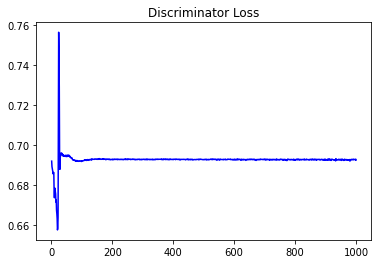

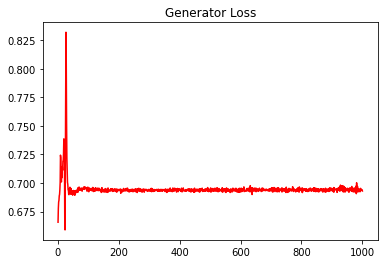

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.047617560147345445


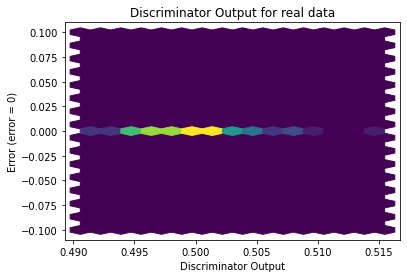

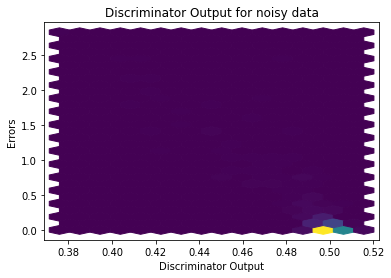

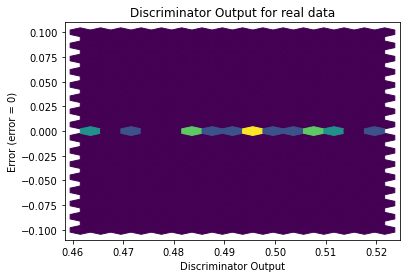

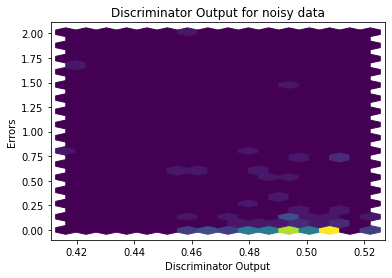

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


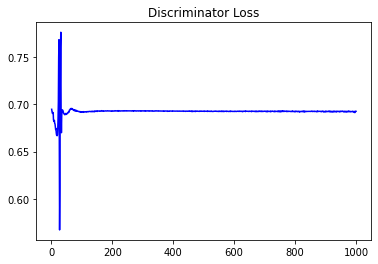

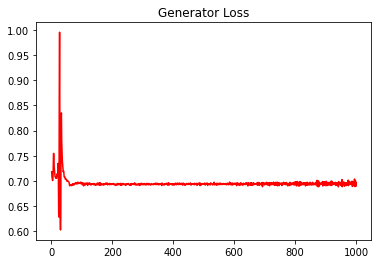

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.07585221826101175


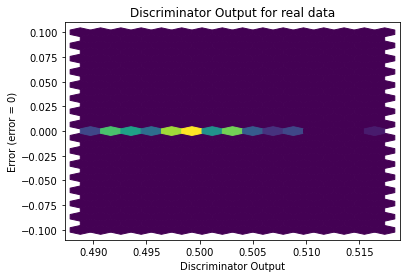

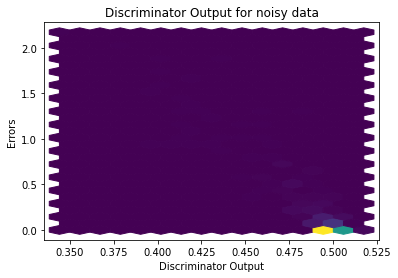

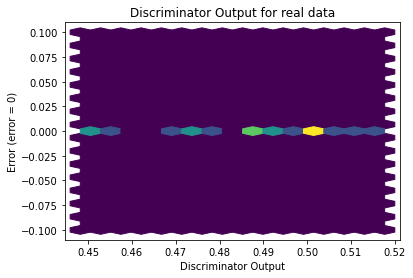

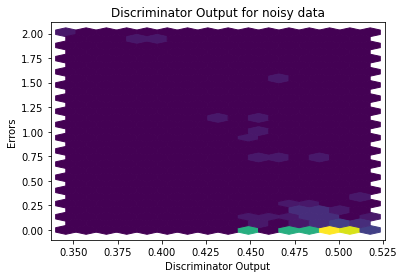

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8277]], requires_grad=True)
